In [53]:
import pandas as pd
import os


In [54]:
all_data=pd.read_csv("/Users/m0b0hag/Desktop/netflix_titles.csv")

In [55]:
all_data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [56]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [57]:
all_data = all_data.drop('director',1)

/var/folders/vr/8yvnshvd2357sgfd9klgxfn00000gq/T/ipykernel_53373/2010494373.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  all_data = all_data.drop('director',1)


In [58]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   cast          5664 non-null   object
 4   country       5758 non-null   object
 5   date_added    6223 non-null   object
 6   release_year  6234 non-null   int64 
 7   rating        6224 non-null   object
 8   duration      6234 non-null   object
 9   listed_in     6234 non-null   object
 10  description   6234 non-null   object
dtypes: int64(2), object(9)
memory usage: 535.9+ KB


In [59]:
all_data= all_data.drop('cast',1)

/var/folders/vr/8yvnshvd2357sgfd9klgxfn00000gq/T/ipykernel_53373/2050022017.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  all_data= all_data.drop('cast',1)


In [60]:
all_data= all_data.dropna()

In [121]:
all_data= all_data.drop('country', axis=1).join(all_data['country'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('country'))


In [103]:
Results=all_data.groupby('country').count()['show_id']
Results


country
                   24
 Afghanistan      125
 Albania           64
 Argentina        382
 Armenia         1728
                 ... 
United States    7379
Uruguay            56
Venezuela           9
Vietnam             4
West Germany        1
Name: show_id, Length: 173, dtype: int64

In [80]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


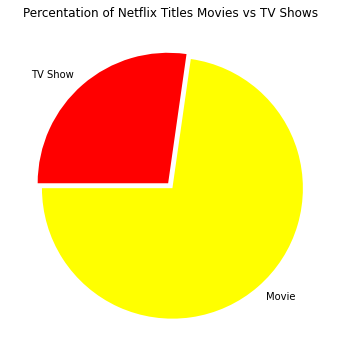

In [91]:
plt.figure(figsize=(12,6))
plt.title("Percentation of Netflix Titles Movies vs TV Shows")
Results = plt.pie(all_data.type.value_counts(),explode=(0.025,0.025), labels=all_data.type.value_counts().index, colors=["yellow","red"], startangle=180)
plt.show()

In [104]:
netflix_movies_df = all_data[all_data.type.str.contains("Movie")]
netflix_shows_df = all_data[all_data.type.str.contains("TV Show")]

In [114]:
netflix_movies_df.year_added = pd.DatetimeIndex(netflix_movies_df.date_added).year
netflix_shows_df.year_added = pd.DatetimeIndex(netflix_shows_df.date_added).year

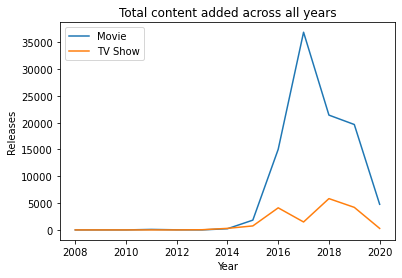

In [120]:
movies_year_df = netflix_movies_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})

shows_year_df = netflix_shows_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})

sns.lineplot(data=movies_year_df, x='year', y='date_added')
sns.lineplot(data=shows_year_df, x='year', y='date_added')
#ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added across all years")
plt.legend(['Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

In [122]:
all_data.to_csv('file_name.csv')